# Image Filters

Image filters are mathematical operations that modify pixel values to achieve a desired transformation.

They have several applications, some of which are noise removal, background subraction and edge detection.

In [1]:
import numpy as np
import napari
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import data
from skimage import filters
from scipy.ndimage import correlate, convolve

Let's analyze this simple array/image:

In [2]:
image1 = np.array([[0, 0, 2, 0, 0],
                   [0, 0, 2, 0, 0],
                   [0, 0, 4, 2, 2],
                   [0, 0, 2, 0, 0],
                   [0, 0, 2, 0, 0]]).astype(float)
image1

array([[0., 0., 2., 0., 0.],
       [0., 0., 2., 0., 0.],
       [0., 0., 4., 2., 2.],
       [0., 0., 2., 0., 0.],
       [0., 0., 2., 0., 0.]])

You can see it as an image with matplotlib (or napari, or skimage).

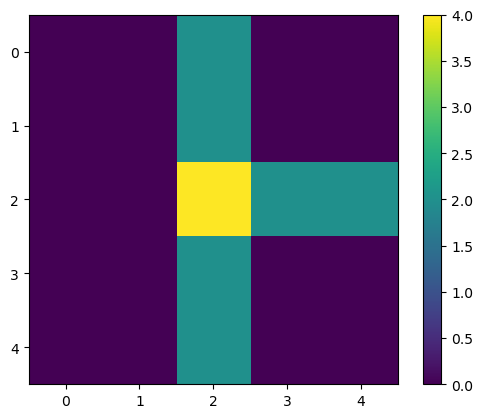

In [3]:
plt.imshow(image1)
plt.colorbar()

## Filtering an image with a custom kernel

More specifically, image filters are the result of small arrays (a.k.a. kernels/footprints) that slide through the image and perform some mathematical operation over the pixels they overlay, assigning a new value to each pixel. This operation is called [cross-correlation](https://en.wikipedia.org/wiki/Cross-correlation), which is very similar to a [convolution](https://en.wikipedia.org/wiki/Convolution), sometimes also used. One of the simplest filters we could design is one with a uniform kernel, which is an array composed of the same value.

### Uniform Kernel

We will apply this uniform kernel over the image.

In [4]:
kernel1 = np.array(
    [[1, 1, 1],
     [1, 1, 1],
     [1, 1, 1]])
print('image = \n', image1)
print('kernel = \n', kernel1)

image = 
 [[0. 0. 2. 0. 0.]
 [0. 0. 2. 0. 0.]
 [0. 0. 4. 2. 2.]
 [0. 0. 2. 0. 0.]
 [0. 0. 2. 0. 0.]]
kernel = 
 [[1 1 1]
 [1 1 1]
 [1 1 1]]


Let's look what happens at the central pixel for example (the one with value 4). Let's call it **pixel4**.
In this case, each of the surrounding pixels and **pixel4** itself will be multiplied by 1 and then summed, like this:

(1 * **0**) + (1 * **2**) + (1 * **0**) +

(1 * **0**) + (1 * **4**) + (1 * **2**) +

(1 * **0**) + (1 * **2**) + (1 * **0**) = 10

We can apply this kernel to all the pixel, i.e. to the image, with the `correlate()` function from scipy:

In [5]:
output1 = correlate(image1, kernel1)
output1

array([[ 0.,  6.,  6.,  6.,  0.],
       [ 0.,  8., 10., 12.,  6.],
       [ 0.,  8., 10., 12.,  6.],
       [ 0.,  8., 10., 12.,  6.],
       [ 0.,  6.,  6.,  6.,  0.]])

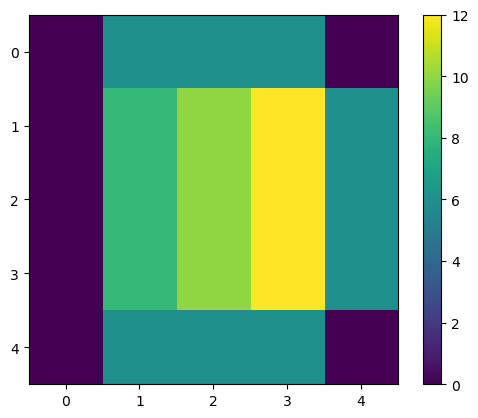

In [6]:
plt.imshow(output1)
plt.colorbar()

Two things can be noted:

    1. The image becomes blurry;
    
    2. The pixel values increase;
    
The first one would be the expected behaviour of a uniform kernel. We are summing each pixel value with its surroundings. We could mitigate the second by normalizing the kernel.

### Mean Filter

If we normalize the kernel by dividing it by the number of elements, we essentially get the mean:

In [7]:
kernel1_normalized = kernel1 / 9
kernel1_normalized

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

or more generally:

In [8]:
kernel1_normalized = kernel1 / kernel1.size
kernel1_normalized

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

And when we apply it again on the original image, we get the following:

[[0.         0.66666667 0.66666667 0.66666667 0.        ]
 [0.         0.88888889 1.11111111 1.33333333 0.66666667]
 [0.         0.88888889 1.11111111 1.33333333 0.66666667]
 [0.         0.88888889 1.11111111 1.33333333 0.66666667]
 [0.         0.66666667 0.66666667 0.66666667 0.        ]]


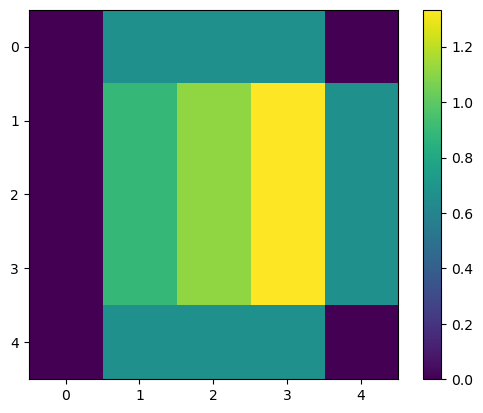

In [9]:
output2 = correlate(image1, kernel1_normalized)
print(output2)

plt.imshow(output2)
plt.colorbar()

This is the mean filter. Like all filters, it does change the pixel values. Now, each new value is the mean of each pixel with its surroundings. It can work as a noise removal, but it is not very good at it. If we have unrepresentative pixels with high values, they will significantly affect the mean.

There are more efficient options for that, like the [median](https://en.wikipedia.org/wiki/Median_filter) and [gaussian](https://en.wikipedia.org/wiki/Gaussian_filter) filters.

### Prewitt Filter (a simple edge detection)

What if we use the following kernel instead?

In [10]:
kernel3 = np.array(
    [[1/3, 0, -1/3],
     [1/3, 0, -1/3],
     [1/3, 0, -1/3]])

[[ 0.         -2.          0.          2.          0.        ]
 [ 0.         -2.66666667 -0.66666667  2.          0.        ]
 [ 0.         -2.66666667 -0.66666667  2.          0.        ]
 [ 0.         -2.66666667 -0.66666667  2.          0.        ]
 [ 0.         -2.          0.          2.          0.        ]]


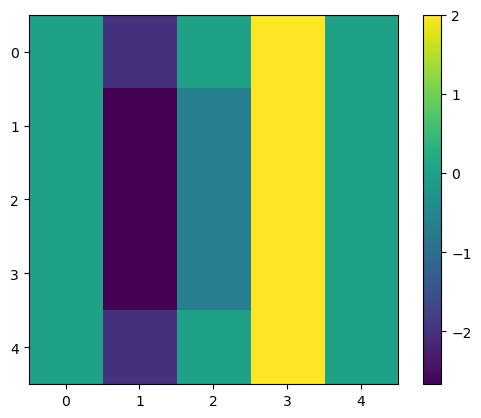

In [11]:
output3 = correlate(image1, kernel3)
print(output3)

plt.imshow(output3)
plt.colorbar()

If we look at the columns number 1 and 3, we can see two vertical lines with high negative (dark blue) and positive (bright yellow) values, respectively. 

Did you see that these columns lie exactly at each side of the central vertical line in the original image (column number 2 in image1)?

This means this filter can highlight vertical edges, i.e., strong transitions along the horizontal direction! Check it out with the brick image!

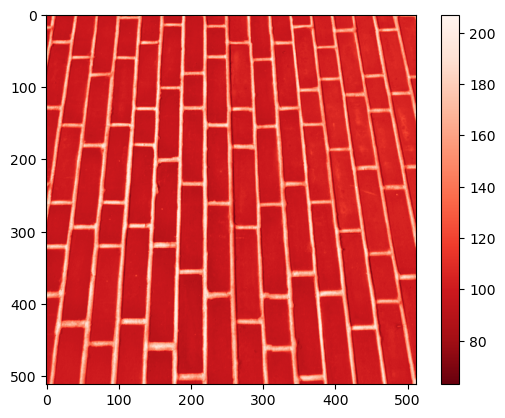

In [12]:
image_brick = data.brick().astype(float)
plt.imshow(image_brick, cmap = 'Reds_r')
plt.colorbar()

In [13]:
brick_v = convolve(image_brick, kernel3)

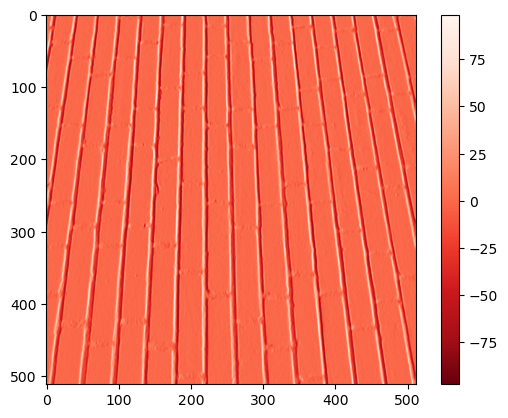

In [14]:
plt.imshow(brick_v, cmap = 'Reds_r')
plt.colorbar()

## Exercise 1

Apply the horizontal Prewitt filter to the same image and display the resulting image.

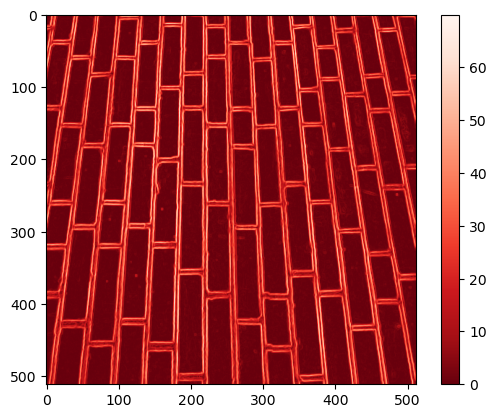

In [15]:
# prewitt filter
brick_new_filter = filters.prewitt(image_brick)
plt.imshow(brick_new_filter, cmap = 'Reds_r')
plt.colorbar()

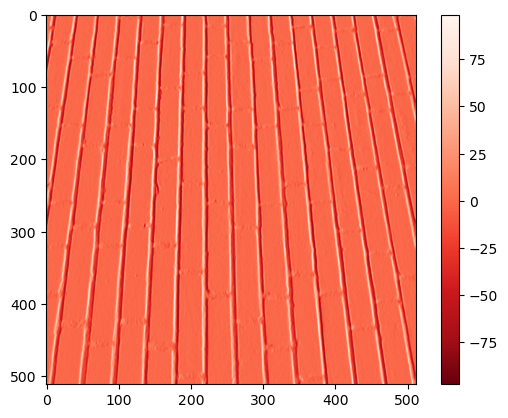

In [16]:
# prewitt_v filter
brick_new_filter_v = filters.prewitt_v(image_brick)
plt.imshow(brick_new_filter_v, cmap = 'Reds_r')
plt.colorbar()

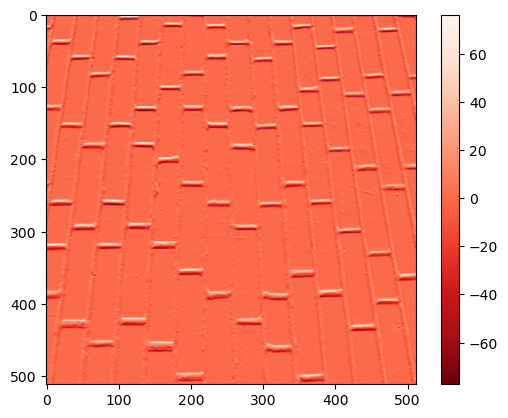

In [17]:
# prewitt_h filter
brick_new_filter_h = filters.prewitt_h(image_brick)
plt.imshow(brick_new_filter_h, cmap = 'Reds_r')
plt.colorbar()

## Exercise 2

Apply the following filters from scikit-image to the cells image and display the outputs:

   - [Sobel](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.sobel)
   - [Gaussian](https://scikit-image.org/docs/dev/api/skimage.filters.html#gaussian)
   - [Median](https://scikit-image.org/docs/dev/api/skimage.filters.html#median)
   - [Laplace](https://scikit-image.org/docs/dev/api/skimage.filters.html#laplace)
   - [Difference_of_Gaussians](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.difference_of_gaussians)
   - Laplacian of Gaussian (this one can be made with others above)

What are each of these filters good at?

*Hint: you don't need to manually define a kernel anymore for these. Use default parameters*

In [18]:
from skimage.filters import sobel, gaussian, median, laplace, difference_of_gaussians

In [19]:
# Read cells image
image_path = '../../data/mitosis_mod.tif'
image_cells = imread(image_path)

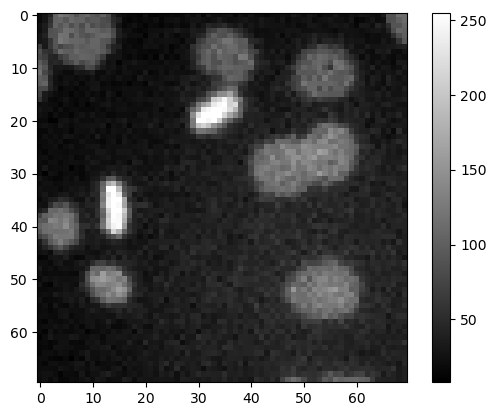

In [20]:
plt.imshow(image_cells, cmap='gray')
plt.colorbar()

F i l t e r e d   w i t h   s o b e l   f i l t e r


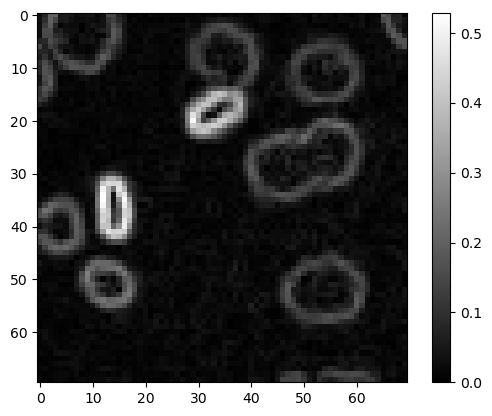

In [21]:
# sobel filter
cells = filters.sobel(image_cells)
plt.imshow(cells, cmap = 'gray')
print(*'Filtered with sobel filter')
plt.colorbar()

F i l t e r e d   w i t h   g a u s s i a n   f i l t e r


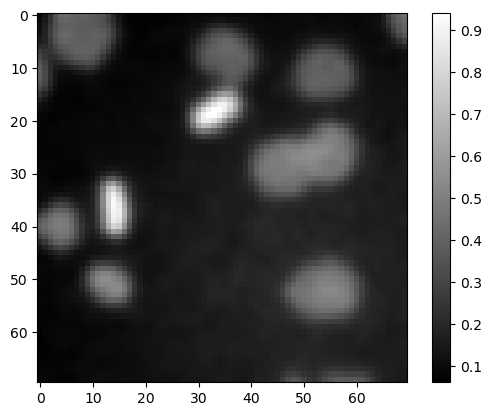

In [22]:
# gaussian filter
cells = filters.gaussian(image_cells)
plt.imshow(cells, cmap = 'gray')
print(*'Filtered with gaussian filter')
plt.colorbar()

F i l t e r e d   w i t h   m e d i a n   f i l t e r


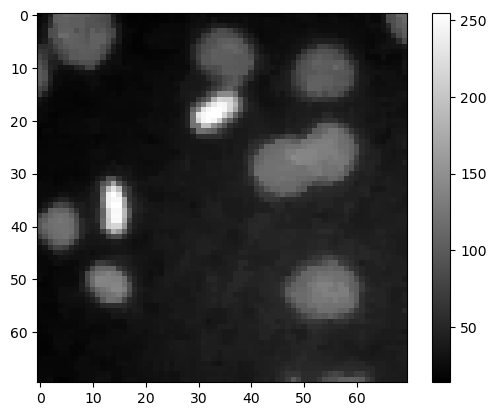

In [23]:
# median filter
cells = filters.median(image_cells)
plt.imshow(cells, cmap = 'gray')
print(*'Filtered with median filter')
plt.colorbar()

F i l t e r e d   w i t h   l a p l a c e   f i l t e r


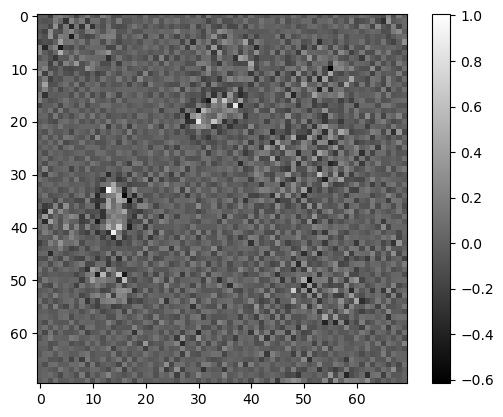

In [24]:
# laplace filter
cells = filters.laplace(image_cells)
plt.imshow(cells, cmap = 'gray')
print(*'Filtered with laplace filter')
plt.colorbar()

F i l t e r e d   w i t h   d i f f e r e n c e _ o f _ g a u s s i a n s   f i l t e r


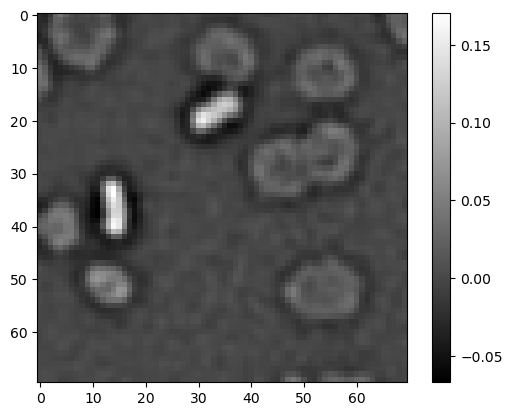

In [25]:
# difference of gaussian filter
cells = filters.difference_of_gaussians(image_cells, 1)
plt.imshow(cells, cmap = 'gray')
print(*'Filtered with difference_of_gaussians filter')
plt.colorbar()

## Exercise 3

Below, we binarized `image_cells` with the Otsu method.

Repeat this for the output images from Exercise 2 and display new binary images.

In your opinion, which of these results is less noisy?

In [26]:
from skimage.filters import threshold_otsu

In [27]:
# Get threshold value using Otsu method
threshold_value = threshold_otsu(image_cells)
# Binarize image with threshold value
binary_image = image_cells > threshold_value

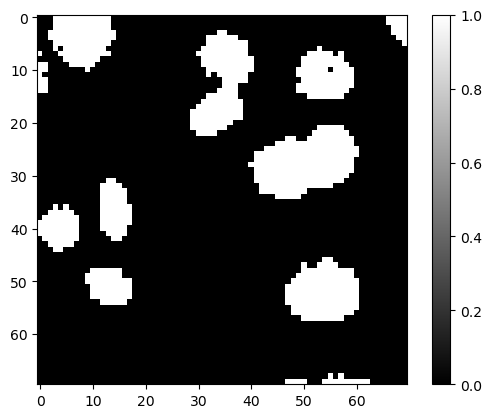

In [28]:
plt.imshow(binary_image, cmap='gray')
plt.colorbar()

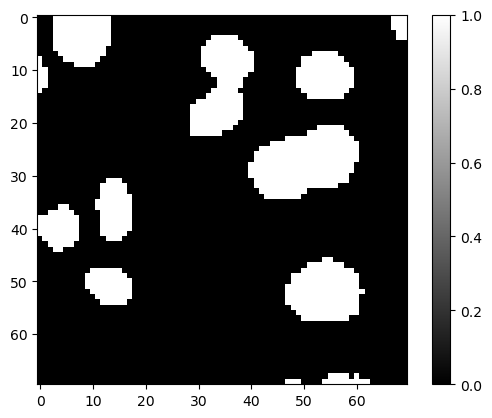

In [30]:
# gaussian filter
cells_new = filters.gaussian(image_cells)

# Get threshold value using Otsu method
threshold_value = threshold_otsu(cells_new)
# Binarize image with threshold value
binary_image = cells_new > threshold_value

plt.imshow(binary_image, cmap='gray')
plt.colorbar()

## Exercise 4 (optional)

Now that you know how filters work on images, you can design your filter! Play with it by designing your own (small) kernel and see the results! :D 

In [29]:
# my_kernel = 